In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/data/used_mobile_phone.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB
None


,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59


In [3]:
df['month'] = df['create_date'].apply(lambda x : x[:7])

df['month'].value_counts()

2016-10    2956
2017-03    1311
2016-08     107
2016-09     105
2016-04     102
2016-05      89
2016-06      76
2016-07      74
2016-03      70
2016-02      61
Name: month, dtype: int64

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


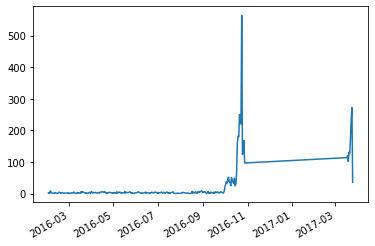

In [4]:
# 일별 거래 횟수를 계산하여 그래프로 출력
df_day = pd.to_datetime(df['create_date'].apply(lambda x : x[:10])).value_counts()
df_day.plot()
plt.show()

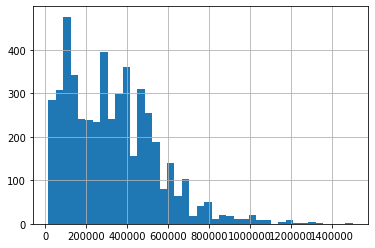

In [5]:
df['price'].hist(bins='auto')

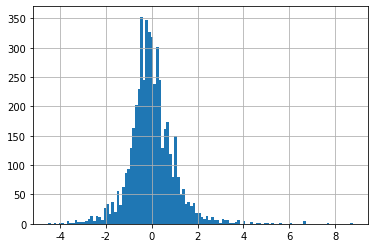

In [6]:
# 휴대폰 기종별 가격의 평균과 표준편차 계산
df_price_model_mean = df.groupby('phone_model')['price'].transform(lambda x : np.mean(x))
df_price_model_std = df.groupby('phone_model')['price'].transform(lambda x : np.std(x))

df_price_model_z_score = (df['price'] - df_price_model_mean) / df_price_model_std
df_price_model_z_score.hist(bins='auto')

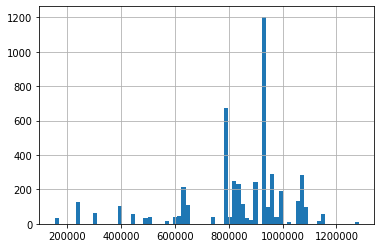

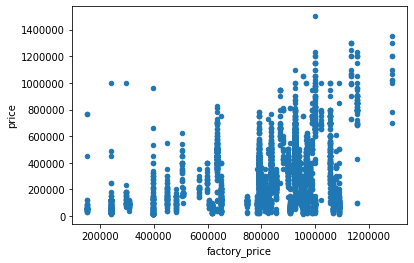

In [7]:
df['factory_price'].hist(bins='auto')

df.plot.scatter(x='factory_price', y='price')

count      64.000000
mean       77.359375
std       143.432786
min        10.000000
25%        23.000000
50%        35.000000
75%        90.500000
max      1002.000000
Name: phone_model, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x1c850175e08>,
 'caps': [<matplotlib.lines.Line2D at 0x1c850178dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c850175408>],
 'medians': [<matplotlib.lines.Line2D at 0x1c85017cd48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c85017ce48>],
 'means': []}

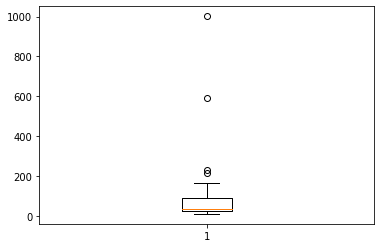

In [8]:
# 기종별 총 거래 데이터 개수 
model_counts = df['phone_model'].value_counts()
print(model_counts.describe())

# 기종별 총 거래 데이터 개수를 사앚 그림으로 살펴보기
plt.boxplot(model_counts)

apple      2450
samsung    1642
lg          677
pantech      57
sony         37
huawei       35
tg           28
sky          25
Name: maker, dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x1c8512bf608>,
 'caps': [<matplotlib.lines.Line2D at 0x1c8512bfec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c8512b9b88>],
 'medians': [<matplotlib.lines.Line2D at 0x1c8512c4e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c8512c8cc8>],
 'means': []}

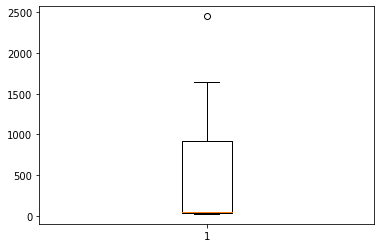

In [15]:
maker_counts = df['maker'].value_counts()
print(maker_counts)
plt.boxplot(maker_counts)

In [12]:
df['price_index'].value_counts()

103.05    3061
95.96     1311
102.59     448
94.90      131
Name: price_index, dtype: int64

In [16]:
# Random Forest Regressor를 이용한 가격 예측
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

df = df[['price', 'phone_model', 'factory_price', 'maker', 'price_index', 'month']]
df = pd.get_dummies(df, columns=['phone_model', 'maker', 'month'])
X = df.loc[:, df.columns != 'price']
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

forest = RandomForestRegressor(n_estimators=1000, criterion='mse')
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# 학습한 모델 평가
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 10616948099.028, test: 13890531245.800
R2 train: 0.781, test: 0.682


[('factory_price', 0.4070464875352539),
 ('maker_apple', 0.29632117616539766),
 ('phone_model_galaxy s3 3g 8gb', 0.022120262837876846),
 ('phone_model_iphone se 64gb', 0.021535340689753314),
 ('price_index', 0.020307980061659965),
 ('phone_model_galaxy s4 32gb', 0.016659989853301315),
 ('month_2017-03', 0.014916992428372687),
 ('maker_samsung', 0.014408941797289989),
 ('phone_model_galaxy s6 32gb', 0.012475000593361797),
 ('month_2016-05', 0.011129427197591319)]

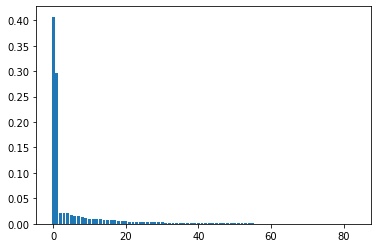

In [18]:
# 피처 중요도 분석하기
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices])

# 학습한 모델의 피처 중요도 출력
feat_labels = X.columns.tolist()
feature = list(zip(feat_labels, forest.feature_importances_))
sorted(feature, key = lambda tup : tup[1], reverse=True)[:10]

In [19]:
for sorted_feature in sorted(feature, key=lambda tup: tup[1], reverse=True):
    if 'month' in sorted_feature[0]:
        print(sorted_feature)

('month_2017-03', 0.014916992428372687)
('month_2016-05', 0.011129427197591319)
('month_2016-09', 0.008268864172940588)
('month_2016-04', 0.007578701263053744)
('month_2016-10', 0.0064186312105702515)
('month_2016-06', 0.004402962051019416)
('month_2016-08', 0.003559305714166739)
('month_2016-07', 0.0027441858713325084)
('month_2016-03', 0.002533045467429846)
('month_2016-02', 0.0010889825275289034)
